# demonstrate CMIP6 forecast model 
on Houston

In [1]:
import numpy as np
from floody import data as D
from floody import floody as F

In [2]:
import corner as DFM

from matplotlib import gridspec
# --- plotting ---
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

import matplotlib.patches as patches
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline 

In [3]:
houston = D.read_zipshape(D.CityZipcodes('houston'))

# get precipitation forecasts for Houston zipcodes

In [4]:
cmip = D.Forecast()

In [5]:
precip = [] 
for lat, lon in zip(np.array(houston['LATITUDE']).astype(float), np.array(houston['LONGITUDE']).astype(float)): 
    _precip = [] 
    for year in range(2022, 2053): 
        __precip = [] 
        for month in range(1, 13):
            __precip.append(cmip.forecast_latlon(lat, lon % 360, year, month))
        _precip.append(np.array(__precip))
    precip.append(np.array(_precip))
precip = np.array(precip)

[181.61072801 182.94708343 182.62388189 187.09349055 185.99433782
 180.41415697 183.42288077 184.27118105 174.09084359 189.88499133
 177.91395784 166.08805362 193.5504322  187.77117115 185.49554486
 188.96036455 187.75545754 189.44996464 182.50791784 172.76051751
 202.69180236 201.83991237 181.63464252 200.97768581 193.43479027
 180.97599044 185.82790974 195.5495724  184.03314511 189.44336846
 191.62608859]
[167.44319219 177.42563477 178.54812557 173.00369489 183.90316184
 161.43392387 187.65322928 167.27098636 172.88748398 186.1050975
 148.39621825 161.5351509  187.25433067 198.78566576 183.13624108
 196.49561534 188.75260226 173.91964581 178.44495629 151.72325232
 194.34846569 192.30137568 171.33206142 194.87389926 174.47950627
 175.80885596 181.9706414  193.25498294 186.73526826 181.55518873
 180.67485535]


(0.0, 700.0)

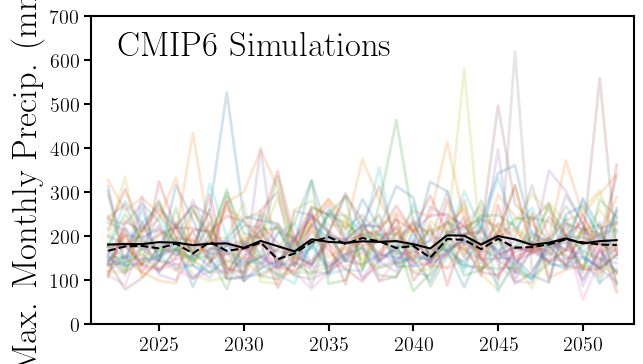

In [6]:
fig = plt.figure(figsize=(7,4))
sub = fig.add_subplot(111)

for i in np.arange(36): # models
    sub.plot(np.arange(2022, 2053), 
             np.max(np.mean(precip[:,:,:,i], axis=0), axis=1), c='C%i' % i, lw=2, alpha=0.2)
sub.plot(np.arange(2022, 2053), 
         np.mean(np.max(np.mean(precip[:,:,:,:], axis=0), axis=1), axis=-1), color='k')
sub.plot(np.arange(2022, 2053), 
         np.median(np.max(np.mean(precip[:,:,:,:], axis=0), axis=1), axis=-1), color='k', ls='--')
print(np.mean(np.max(np.mean(precip[:,:,:,:], axis=0), axis=1), axis=-1))
print(np.median(np.max(np.mean(precip[:,:,:,:], axis=0), axis=1), axis=-1))


sub.text(0.05, 0.95, 'CMIP6 Simulations', transform=sub.transAxes, ha='left', va='top', fontsize=25)
#sub.set_xlabel('Year', fontsize=25) 
sub.set_xlim(2021, 2053)
sub.set_ylabel('Max. Monthly Precip. (mm)', fontsize=25) 
sub.set_ylim(0., 700.)

In [9]:
X_2022 = D.get_X(np.array(houston['ZIPCODE']).astype(int), # zipcodes
                 np.array(houston['LATITUDE']).astype(float), # latitude
                 np.array(houston['LONGITUDE']).astype(float), 
                 2022)
X_2052_avg = D.get_X(np.array(houston['ZIPCODE']).astype(int), np.array(houston['LATITUDE']).astype(float), 
                 np.array(houston['LONGITUDE']).astype(float), 2052, scenario='average')
X_2052_max = D.get_X(np.array(houston['ZIPCODE']).astype(int), np.array(houston['LATITUDE']).astype(float), 
                 np.array(houston['LONGITUDE']).astype(float), 2052, scenario='max')

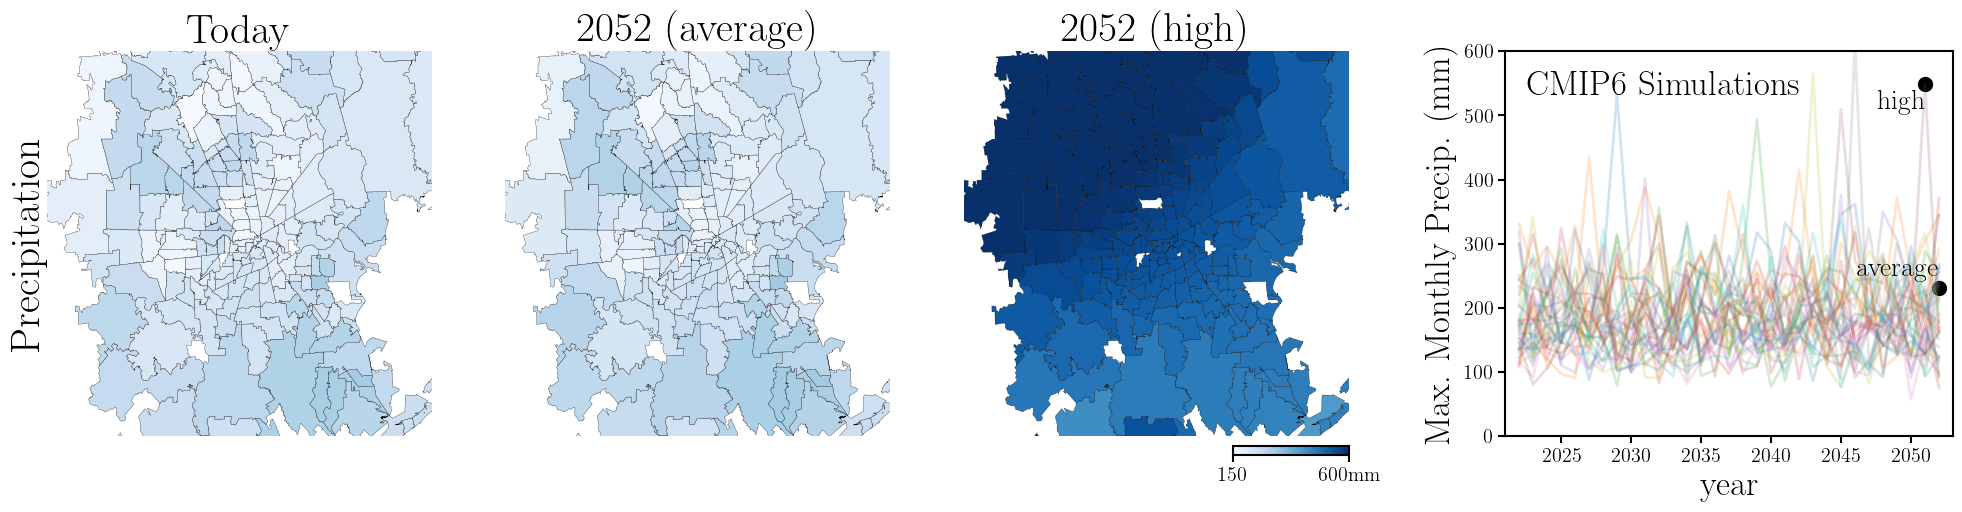

In [30]:
xlim = (-96.1, -94.75)
ylim = (29.25, 30.25)

# create map figure and axes
fig = plt.figure(figsize=(25,5))
gs = gridspec.GridSpec(1, 17)# width_ratios=[4, 1])

for i in range(3): 
    ax = plt.subplot(gs[i*4:(i+1)*4])
    
    houston['blanck'] = [X_2022, X_2052_avg, X_2052_max][i][:,0]
    ax = houston.plot(column='blanck', cmap='Blues', edgecolor='k', 
                      linewidth=0.2, vmin=150., vmax=600., ax=ax, 
                      aspect=(xlim[1] - xlim[0])/(ylim[1] - ylim[0]))
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    if i == 0: ax.text(0.0, 0.5, 'Precipitation', rotation=90., 
                       transform=ax.transAxes, ha='right', va='center', fontsize=30)
    ax.set_axis_off()
    ax.set_title(['Today', '2052 (average)', '2052 (high)'][i], fontsize=30)

    if i == 2: 
        sc = ax.scatter([], [], c=[], cmap='Blues', vmin=150., vmax=600.)
        cbaxes = ax.inset_axes([0.7, -0.05, 0.3, 0.025],
                               transform=ax.transAxes) 
        cbar = plt.colorbar(sc, ticks=[150, 600], cax=cbaxes, orientation='horizontal')
        cbar.ax.set_xticklabels(['150', '600mm'])

# forecast plot
sub = plt.subplot(gs[-4:]) #fig.add_subplot(155)

for i in np.arange(36): # models
    sub.plot(np.arange(2022, 2053), 
             np.max(np.median(precip[:,:,:,i], axis=0), axis=1), c='C%i' % i, lw=2, alpha=0.2)

sub.scatter([2052], [np.median(X_2052_avg[:,0])], c='k', s=100)
sub.scatter([2051], [np.median(X_2052_max[:,0])], c='k', s=100)
sub.text(2052, np.median(X_2052_avg[:,0])+10, 'average', ha='right', va='bottom', fontsize=20)
sub.text(2051, np.median(X_2052_max[:,0])-10, 'high', ha='right', va='top', fontsize=20)

sub.text(0.05, 0.95, 'CMIP6 Simulations', transform=sub.transAxes, ha='left', va='top', fontsize=25)
sub.set_xlabel('year', fontsize=25) 
sub.set_xlim(2021, 2053)
sub.set_ylabel('Max. Monthly Precip. (mm)', fontsize=25) 
sub.set_ylim(0., 600.)

fig.subplots_adjust(hspace=0.2, wspace=0.1)
#plt.tight_layout(pad=0.2, w_pad=0.1)
fig.savefig('forecast_demo.pdf', bbox_inches='tight')#, pad_inches=0.1)#bbox_inches=0.1)